Analysis of Na-Cl simulations in solvent

In [3]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

Unbiased MD simulation generated by LAMMPS / 1 ns 

In [4]:
x = np.loadtxt('colvar-md.dat')

`colvar-md.dat` time (ps) | distance (nm) | Cl-solvent coordination number

In [7]:
x

array([[0.000000e+00, 2.305370e-01, 1.954282e+00],
       [2.000000e-01, 2.975580e-01, 1.788422e+00],
       [4.000000e-01, 2.454770e-01, 1.470518e+00],
       ...,
       [9.996000e+02, 5.285820e-01, 2.508549e+00],
       [9.998000e+02, 5.524840e-01, 2.122575e+00],
       [1.000000e+03, 5.299120e-01, 2.336619e+00]])

Figures:

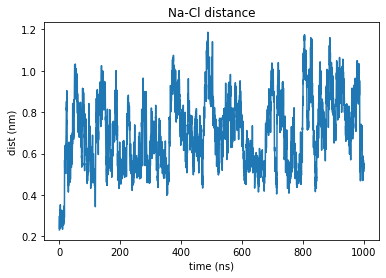

In [15]:
plt.plot(x[:,0], x[:,1])
plt.xlabel('time (ns)');
plt.ylabel('dist (nm)');
plt.title('Na-Cl distance');

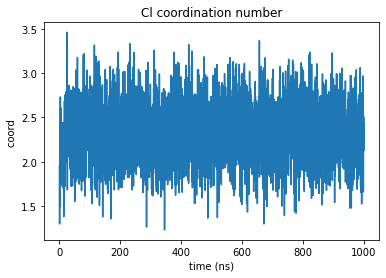

In [17]:
plt.plot(x[:,0], x[:,2])
plt.xlabel('time (ns)');
plt.ylabel('coord ');
plt.title('Cl coordination number');

Probability density / Na-Cl distance

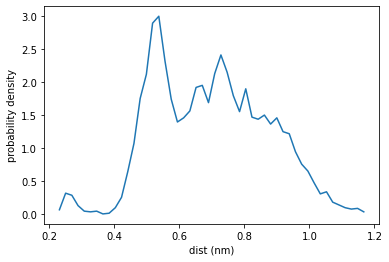

In [21]:
h, bins = np.histogram(x[:,1], bins=50, density=True)

plt.plot(bins[:-1], h);
plt.xlabel('dist (nm)');
plt.ylabel('probability density');

Free energy (kJ/mol) along the distance: $F=-\beta^{-1}\log P$, where $\beta$ is the inverse temperature and $P$ is the probability distribution; $\beta$ -- https://en.wikipedia.org/wiki/KT_(energy)

In [23]:
beta = 1.0 / 2.479
F = -1.0 / beta * np.log(h)

<ipython-input-23-bd0ce7c18fa8>:3: RuntimeWarning: divide by zero encountered in log
  F = -1.0 / beta * np.log(h);


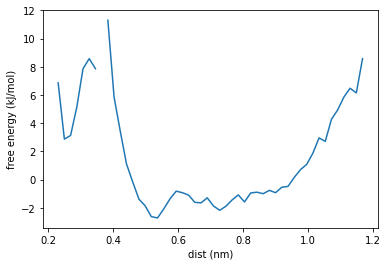

In [25]:
plt.plot(bins[:-1], F);
plt.xlabel('dist (nm)');
plt.ylabel('free energy (kJ/mol)');

Biased well-temepered metadynamics simulation generated by LAMMPS

In [30]:
x = np.loadtxt('colvar-mtd.dat', usecols=(0,1,4))

`colvar-mtd.dat` time (ps) | distance (nm) | bias potential (kJ/mol)

In [31]:
x

array([[0.000000e+00, 8.370010e-01, 0.000000e+00],
       [2.000000e-01, 4.975980e-01, 0.000000e+00],
       [4.000000e-01, 4.434820e-01, 0.000000e+00],
       ...,
       [9.999600e+03, 5.849620e-01, 1.162787e+00],
       [9.999800e+03, 5.677790e-01, 1.737931e+00],
       [1.000000e+04, 5.706380e-01, 1.638257e+00]])

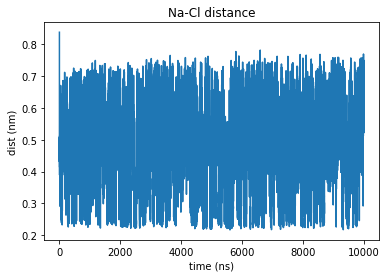

In [32]:
plt.plot(x[:,0], x[:,1])
plt.xlabel('time (ns)');
plt.ylabel('dist (nm)');
plt.title('Na-Cl distance');

Biased probability density

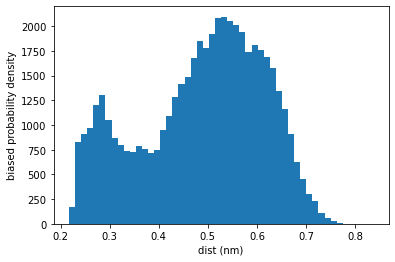

In [33]:
plt.hist(x[:,1], bins=50);
plt.xlabel('dist (nm)');
plt.ylabel('biased probability density');

Calculate weights for unbiasing from the bias potential: $w=\exp(\beta V)$

In [34]:
v = beta * x[:,2]
v -= v.max()
w = np.exp(v)

In [35]:
w

array([0.21898556, 0.21898556, 0.21898556, ..., 0.35004462, 0.44145103,
       0.42405356])

Unbiased probability density

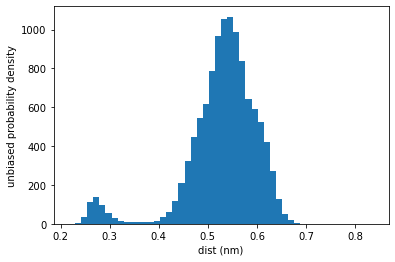

In [36]:
plt.hist(x[:,1], bins=50, weights=w);
plt.xlabel('dist (nm)');
plt.ylabel('unbiased probability density');

Free energy along distance between Na and Cl

In [37]:
h, b = np.histogram(x[:,1], bins=50, weights=w)

In [38]:
h /= h.max()
f = -1. / beta * np.log(h)
f -= f.min()

<ipython-input-38-bb9ce006a009>:2: RuntimeWarning: divide by zero encountered in log
  f = -1. / beta * np.log(h)


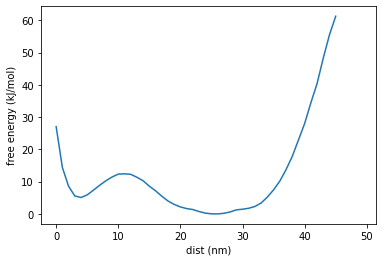

In [41]:
plt.plot(f)
plt.xlabel('dist (nm)');
plt.ylabel('free energy (kJ/mol)');